In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
df = pd.read_csv('/Users/hadjer/Desktop/dataset_gab*.csv')
df

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


numeric_variables = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend','Nbr_Transaction_Weekend']

numeric_data = df[numeric_variables]

# Créer un objet scaler de la classe robustScaler
scaler = RobustScaler()

# Utiliser la méthode fit_transform() sur l'objet scaler pour standariser les données
X_scaled = scaler.fit_transform(numeric_data)

In [5]:
X_scaled

array([[-0.0204305 ,  0.07246377, -0.35813953, -0.39130435],
       [ 0.1670923 ,  0.        , -0.35813953, -0.39130435],
       [ 0.03611821, -0.11594203, -0.35813953, -0.39130435],
       ...,
       [-0.62349507, -0.67391304, -0.35581395, -0.36956522],
       [-0.61765779, -0.65942029, -0.3372093 , -0.32608696],
       [-0.62203575, -0.67391304, -0.35813953, -0.39130435]])

In [3]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X_scaled )

In [7]:
X_pca

array([[-0.97625793,  0.44400128,  0.00645542, -0.0930968 ],
       [-0.91744481,  0.50367581, -0.11133774,  0.04661911],
       [-1.03653807,  0.37585326, -0.10421893,  0.04169133],
       ...,
       [-1.61227363, -0.265272  , -0.04513368,  0.01177092],
       [-1.5712059 , -0.28359235, -0.02515526,  0.01946999],
       [-1.62344567, -0.2537169 , -0.05732562,  0.00321818]])

In [4]:
comp = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(numeric_variables))],
    "Valeur propre": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, decimals=2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, decimals=2)
})

# Affichage des résultats de l'ACP
print(comp)

  Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1       2.356467                 87.94                  87.94
1      Dim2       0.290785                 10.85                  98.80
2      Dim3       0.032247                  1.20                 100.00


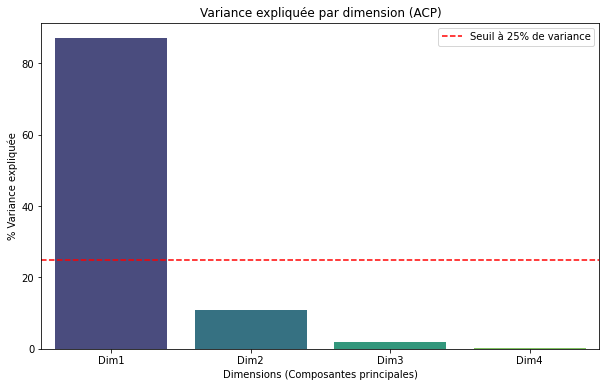

In [9]:
#choisir le nombre de composantes principales:
# Scree plot pour visualiser la variance expliquée par composante 
plt.figure(figsize=(10, 6))
sns.barplot(x="Dimension", y="% variance expliquée", data=comp, palette="viridis")
plt.title("Variance expliquée par dimension (ACP)")
plt.xlabel("Dimensions (Composantes principales)")
plt.ylabel("% Variance expliquée")
plt.axhline(y=25, color="red", linestyle="--", label="Seuil à 25% de variance")
plt.legend()
plt.show()

In [10]:
# Obtenir les composantes principales
components = pca.components_

# Nombre de composantes principales
n_components = pca.n_components_

# Noms des variables
feature_names = numeric_variables

# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

                         PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
retrait_Semaine             0.746766     0.101263     0.014180     0.002694
Nbr_Transaction_Semaine     0.669673     0.100919     0.014020     0.002967
retrait_Weekend             0.906432     0.101631     0.017190     0.001764
Nbr_Transaction_Weekend     0.729304     0.073447     0.023471     0.002162


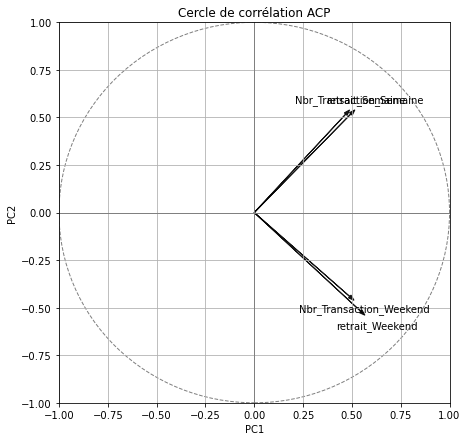

In [11]:
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(7, 7))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')
# Ajouter une grille
plt.grid(True)
# Afficher la figure
plt.show()

#### Réduction de la Redondance : La forte corrélation entre les variables  "retrait semaine" et "nombre de transactions semaine", ainsi que "retrait week-end" et "nombre de transactions week-end" suggère qu'elles capturent essentiellement la même information. Cela me permet de reduire le nombre de variables afin d'ameliorer la performance de mon modele.

In [13]:
# Contributions des variables à PC1
contributions_pc1 = pca.components_[0] ** 2 * pca.explained_variance_ratio_[0]
# Trier les indices des variables par contribution à PC1
indices_pc1 = np.argsort(contributions_pc1)[::-1]
# Sélectionner les 10 variables ayant les plus grandes contributions à PC1
top_contrib_pc1 = indices_pc1[:10]
# Afficher les contributions des variables à PC1
print("Contributions des variables à PC1:")
for idx in top_contrib_pc1:
    print(f"{feature_names[idx]}: {contributions_pc1[idx]}")

# Contributions des variables à PC2
contributions_pc2 = pca.components_[1] ** 2 * pca.explained_variance_ratio_[1]
# Trier les indices des variables par contribution à PC2
indices_pc2 = np.argsort(contributions_pc2)[::-1]
# Sélectionner les 10 variables ayant les plus grandes contributions à PC2
top_contrib_pc2 = indices_pc2[:10]
# Afficher les contributions des variables à PC2
print("\nContributions des variables à PC2:")
for idx in top_contrib_pc2:
    print(f"{feature_names[idx]}: {contributions_pc2[idx]}")

Contributions des variables à PC1:
retrait_Weekend: 0.258398588665061
retrait_Semaine: 0.21288231012095843
Nbr_Transaction_Weekend: 0.2079042916780216
Nbr_Transaction_Semaine: 0.19090527073885255

Contributions des variables à PC2:
retrait_Weekend: 0.028972206622366853
retrait_Semaine: 0.02886715664774067
Nbr_Transaction_Semaine: 0.028769250094898634
Nbr_Transaction_Weekend: 0.020937692833241362


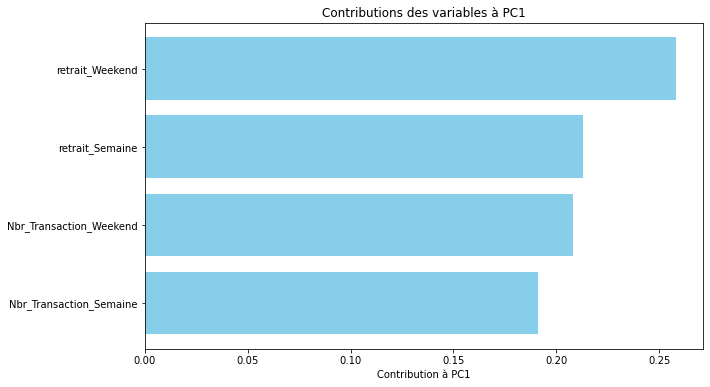

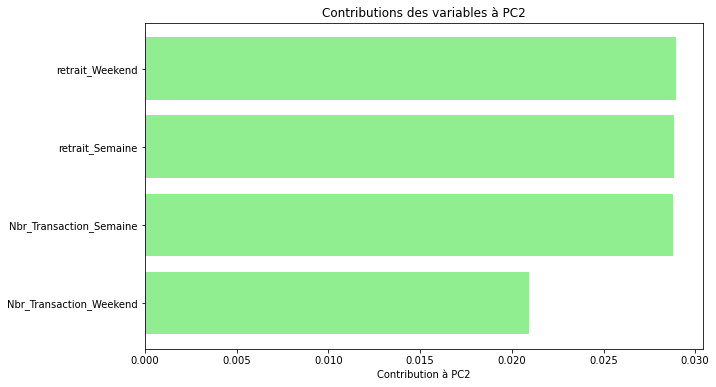

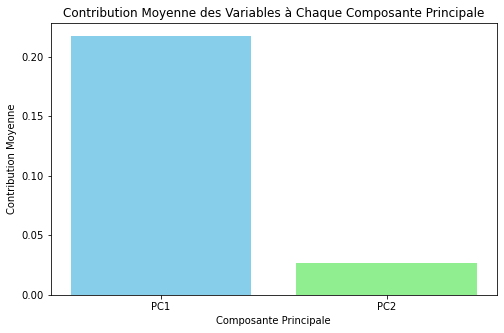

In [14]:
# Créer un graphique pour visualiser les contributions des variables à PC1
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_contrib_pc1)), contributions_pc1[top_contrib_pc1],color='skyblue')
plt.yticks(range(len(top_contrib_pc1)), [feature_names[i] for i in top_contrib_pc1])
plt.xlabel('Contribution à PC1')
plt.title('Contributions des variables à PC1')
plt.gca().invert_yaxis()
plt.show()
# Créer un graphique pour visualiser les contributions des variables à PC2
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_contrib_pc2)), contributions_pc2[top_contrib_pc2],color='lightgreen')
plt.yticks(range(len(top_contrib_pc2)), [feature_names[i] for i in top_contrib_pc2])
plt.xlabel('Contribution à PC2')
plt.title('Contributions des variables à PC2')
plt.gca().invert_yaxis()
plt.show()
import numpy as np
# Calculer les contributions moyennes des variables à chaque PC
mean_contributions_pc1 = np.mean((pca.components_[0] ** 2) * pca.explained_variance_ratio_[0])
mean_contributions_pc2 = np.mean((pca.components_[1] ** 2) * pca.explained_variance_ratio_[1])
# Créer un graphique pour visualiser les contributions moyennes
plt.figure(figsize=(8, 5))
plt.bar(['PC1', 'PC2'], [mean_contributions_pc1, mean_contributions_pc2],color=['skyblue', 'lightgreen'])
plt.xlabel('Composante Principale')
plt.ylabel('Contribution Moyenne')
plt.title('Contribution Moyenne des Variables à Chaque Composante Principale')
plt.show()

### Encodage et representation de la variable 'evenements'

In [15]:
import pandas as pd

# Créer une fonction lambda pour encoder les valeurs
def encode_evenements(value):
    if value == 'inconnu':
        return 0
    else:
        return 1

# Appliquer la fonction lambda à la colonne 'evenements' pour encoder les valeurs
df['evenements_encoded'] = df['evenements'].apply(lambda x: encode_evenements(x))

# Afficher le DataFrame avec la nouvelle colonne encodée
print(df[['evenements', 'evenements_encoded']])

        evenements  evenements_encoded
0      jour de lan                   1
1      jour de lan                   1
2      jour de lan                   1
3      jour de lan                   1
4      jour de lan                   1
...            ...                 ...
18432      inconnu                   0
18433      inconnu                   0
18434      inconnu                   0
18435      inconnu                   0
18436      inconnu                   0

[18437 rows x 2 columns]


In [16]:
df

,nbr_semaine,saison,Plage_horaire,Gab_Code,GabAgence,CodeAgence,CodeWilaya,position_Geographique,Nbr_Transaction_Semaine,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,evenements,evenements_encoded
0,1,hiver,après-midi,800005027,"""CHERAGA \r""",17030,16,nord,104,1655000,0,0,jour de lan,1
1,1,hiver,après-midi,800010027,"""DAR EL BEIDA \r""",17070,16,nord,94,2169000,0,0,jour de lan,1
2,1,hiver,après-midi,800019027,"""ORAN USTO \r""",17100,31,ouest,78,1810000,0,0,jour de lan,1
3,1,hiver,après-midi,800022027,"""BEJAIA \r""",17130,6,est,48,709000,0,0,jour de lan,1
4,1,hiver,après-midi,800023027,"""BEJAIA \r""",17130,6,est,20,279000,0,0,jour de lan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,nord,1,2000,1,2000,inconnu,0
18433,53,hiver,soir,800029027,"""BORDJ EL KIFFAN \r""",17190,16,nord,52,638000,52,638000,inconnu,0
18434,53,hiver,soir,800043027,"""HASSI MESSAOUD \r""",17330,30,sud,1,2000,1,2000,inconnu,0
18435,53,hiver,soir,800145027,"""ORAN USTO \r""",17100,31,ouest,3,18000,3,18000,inconnu,0


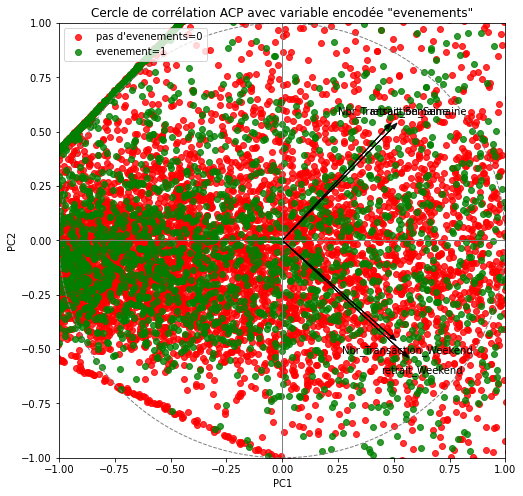

In [19]:
import matplotlib.pyplot as plt

# Définir les couleurs pour les classes (deux possibilités : 0 ou 1)
colors = ['r', 'g']  # Rouge pour 0 (inconnu), Vert pour 1 (autre)

# Créer la figure
fig, ax = plt.subplots(figsize=(8, 8))

# Assurez-vous que y est un DataFrame contenant la colonne 'evenements_encoded'
y_encoded = df['evenements_encoded']

# Tracez le nuage de points pour chaque classe
for color, classe, label in zip(colors, [0, 1], ["pas d'evenements=0", 'evenement=1']):  # 0 pour 'inconnu' (rouge), 1 pour autre (vert)
    ax.scatter(X_pca[y_encoded == classe, 0], X_pca[y_encoded == classe, 1], color=color, alpha=0.8, label=label)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP avec variable encodée "evenements"')
# Ajouter une légende
plt.legend(loc='upper left')
# Afficher la figure
plt.show()


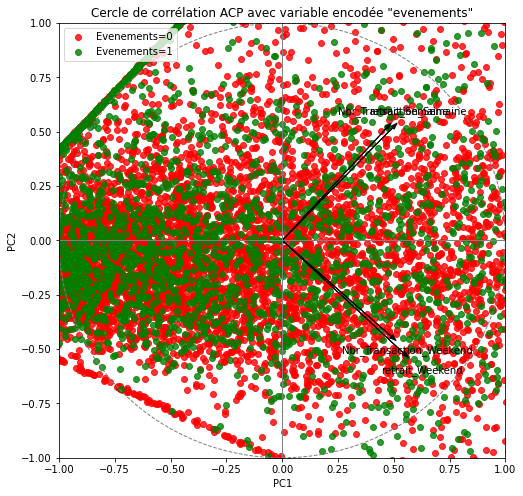

In [17]:
import matplotlib.pyplot as plt

# Définir les couleurs pour les classes (deux possibilités : 0 ou 1)
colors = ['r', 'g'] 

# Créer la figure
fig, ax = plt.subplots(figsize=(8, 8))

# Assurez-vous que y est un DataFrame contenant la colonne 'evenements_encoded'
y_encoded = df['evenements_encoded']

# Tracez le nuage de points pour chaque classe
for color, classe in zip(colors, [0, 1]):  # 0 pour 'inconnu' (rouge), 1 pour evenement (vert)
    ax.scatter(X_pca[y_encoded == classe, 0], X_pca[y_encoded == classe, 1], color=color, alpha=0.8, label=f'Evenements={classe}')

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP avec variable encodée "evenements"')
# Ajouter une légende
plt.legend(loc='upper left')
# Afficher la figure
plt.show()


#### Encodage de la variable 'position_Geographique'

In [20]:
#EN UTILISANT LA MAETHODE 'ONE HOT ENCODING'
import pandas as pd
from sklearn.preprocessing import (LabelEncoder, OrdinalEncoder, OneHotEncoder,
                                    LabelBinarizer, MultiLabelBinarizer)

ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df[["position_Geographique"]]).toarray()
feature_labels = ohe.categories_
features = pd.DataFrame(feature_arry, columns = feature_labels)
df_new = pd.concat([df, features], axis=1)
df_new

,nbr_semaine,saison,Plage_horaire,Gab_Code,GabAgence,CodeAgence,CodeWilaya,position_Geographique,Nbr_Transaction_Semaine,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,evenements,evenements_encoded,"(est,)","(nord,)","(ouest,)","(sud,)"
0,1,hiver,après-midi,800005027,"""CHERAGA \r""",17030,16,nord,104,1655000,0,0,jour de lan,1,0.0,1.0,0.0,0.0
1,1,hiver,après-midi,800010027,"""DAR EL BEIDA \r""",17070,16,nord,94,2169000,0,0,jour de lan,1,0.0,1.0,0.0,0.0
2,1,hiver,après-midi,800019027,"""ORAN USTO \r""",17100,31,ouest,78,1810000,0,0,jour de lan,1,0.0,0.0,1.0,0.0
3,1,hiver,après-midi,800022027,"""BEJAIA \r""",17130,6,est,48,709000,0,0,jour de lan,1,1.0,0.0,0.0,0.0
4,1,hiver,après-midi,800023027,"""BEJAIA \r""",17130,6,est,20,279000,0,0,jour de lan,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,nord,1,2000,1,2000,inconnu,0,0.0,1.0,0.0,0.0
18433,53,hiver,soir,800029027,"""BORDJ EL KIFFAN \r""",17190,16,nord,52,638000,52,638000,inconnu,0,0.0,1.0,0.0,0.0
18434,53,hiver,soir,800043027,"""HASSI MESSAOUD \r""",17330,30,sud,1,2000,1,2000,inconnu,0,0.0,0.0,0.0,1.0
18435,53,hiver,soir,800145027,"""ORAN USTO \r""",17100,31,ouest,3,18000,3,18000,inconnu,0,0.0,0.0,1.0,0.0
